<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 5</center></b><h2>
<h3><b><center>Modelos Cosmológicos</center></b><h3>
<h5><center><b>Asignada</b>: 17 de Octubre de 2023</center><h5>
<h5><center><b>Entrega</b>: 31 de Octubre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Manuela Góez Estepa
<br/>
<b>Última actualización</b>: 31 de Octubre
<hr/>

**Objetivo**: El objetivo de esta tarea es resolver las ecuaciones de Firedmann-Lemaitre para describir la expansión del universo bajo distintas condiciones de contenido de masa-energía y otros observables cosmológicos.

In [ ]:
#Librerías
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt
from scipy.constants import c, G

# 1. Unidades canónicas cosmológicas



**Procedimiento**:

1. Vamos a introducir unas unidades convenientes para tratar numéricamente con problemas cosmológicos. En estas unidades $G=1$, $c=1$ y $H_0=1$. Llamaremos a estas las *unidades canónicas de la cosmología*. Determine el valor de las unidades de tiempo, longitud, masa y densidad.  

In [ ]:
#Constante de Huble tiempo presente
H0 = 2.3e-18 #1/s

Considerando que la constante de Hubble tiene unidades de $[km/s/Mpc]≡[1/s]$, entonces se puede calcular la unidad de tiempo como $U_t=1/H_0$

In [ ]:
Ut = 1 / H0

print(f"La unidad de tiempo es {Ut:.2e} s ")

La unidad de tiempo es 4.35e+17 s 


In [ ]:
# Convertir de Mpc/km/s a mil millones de años
UTau= (Ut/ 3.15e16 )

Usando que la velocidad de la luz tiene unidades de $[m/s]\equiv \frac{U_l}{U_t}$, entonces $U_l = c U_t$, con $c=2.998\times 10^8 [m/s]$ en el Sistema Internacional de Medidas.


In [ ]:
Ul = c * Ut

print(f"La unidad de longitud es {Ul:.2e} m ")

La unidad de longitud es 1.30e+26 m 


La constante de gravitación universal en el sistema internacional es $G=6.67\times 10^-11 [m^3/kg/s^2]$, por lo que las unidades de $[G]\equiv \frac{U_l^3}{U_mU_t^2}$ y se puede encontrar:

$$U_m=\frac{U_l^3}{GU_t^2}$$

In [ ]:
Um = Ul**3 / (G * Ut**2)

print(f"La unidad de masa es {Um:.2e} kg ")

La unidad de masa es 1.76e+53 kg 


La densidad está dada en unidades de $[kg/m^3]$, así que se puede encontrar $U_\rho$ como:

$$U_\rho = \frac{U_m}{U_l^3}$$

In [ ]:
Urho = Um / Ul**3

print(f"La unidad de densidad es {Urho:.2e} kg/m³ ")

La unidad de densidad es 7.93e-26 kg/m³ 


# 2. Solución numérica de $H(t)$ y $\rho(t)$


2. Resuelva numéricamente las ecuaciones diferenciales para $H(t)$ y $\rho(t)$ derivadas de la conservación de la masa y la segunda ley de Newton (ecuación de Cauchy):

  $$
  \begin{aligned}
\dot{\rho} & =-3 \rho H(t) \\
\dot{H}+H^2 & =-\frac{4 \pi}{3} G \rho(t)
\end{aligned}
  $$

 Para ello asuma como valores actuales $\rho(t_0)=\rho_0=3\times 10^{-27}$ kg/m$^3$ y $H(t_0) = H_0 = 70$ km/s/Mpc. No nos interesa tanto el futuro como el pasado. Use $t_0=0$ y determine el valor $\tau$ (negativo, porque es en el pasado) para el cuál la integral produce valores muy grandes de la densidad (asíntota). Este valor, $\tau$ es la edad del universo predicha por el modelo. ¿Qué pasa con la edad del universo para valores de $\rho_0$ mayores? ¿Qué pasa para $\rho_0 = 0$ (universo vacío)?

In [ ]:
#Unidades canónicas

H_0 = 1
G = 1
c = 1

Se puede apreciar que las ecuaciones de evolución cosmológica corresponden a un sistema de ecuaciones acopladas.

Para solucionar la ecuación en primer lugar se crea una función que entrega los valores $\dot{\rho}$ y $\dot{H}$, es decir, las derivadas temporales de la densidad y el parámetro de Hubble.

Para resolver ecuaciones diferenciales ordinarias con condición inicial es útil utilizar la función *solve_ivp* de *scipy.integrate*.

In [ ]:
"""Para resolver con odeint se debe hacer explícita la dependencia
temporal en los argumentos de la función a integrar, así como las
condiciones iniciales."""

def evolucion(t,Y):
    #Ambos parámetros se pasan dentro de una lista Y
    rho, H = Y
    d_rho_dt = -3 * rho * H
    d_H_dt = -H**2 - (4 * np.pi / 3) * G * rho
    return [d_rho_dt, d_H_dt]

In [ ]:
#Condiciones Iniciales en unidades canónicas

rho_t0 = 3e-27 / Urho    #Um/Ul**3

y0 = [rho_t0 , H_0]    #arreglo de CI

La función *solve_ivp* recibe como parámetros:

1. el sistema de ecuaciones en una función, con argumentos: *Y* que involucra los parámetros a integrar, y *t* el tiempo.
2. Intervalo de tiempo en el que se integra.
3. Los valores de la condición inicia *Y0*.
4. Los tiempos para los que se requiere la solución.

In [ ]:
#Se debe integrar en el pasado

t = np.linspace(0,-5, 1000)

# Resolviendo el Sistema de ED
solucion = solve_ivp(evolucion, (t[0],t[-1]),
                     y0, t_eval=t)

In [ ]:
#¿qué retorna la función?
solucion

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00 -5.005e-03 ... -7.958e-01 -8.008e-01]
        y: [[ 3.785e-02  3.842e-02 ...  9.333e+02  9.165e+03]
            [ 1.000e+00  1.006e+00 ...  9.157e+01  2.819e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 812
     njev: 0
      nlu: 0

In [ ]:
#Extraer tiempos y solucion en rho y H
t = solucion.t
rhos, Hs = solucion.y

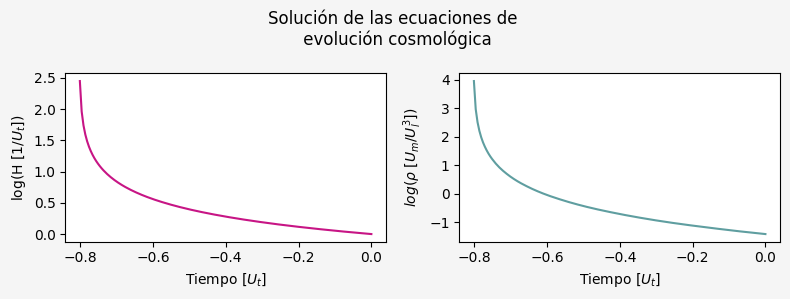

In [ ]:
fig, axs = plt.subplots(1, 2, facecolor= "whitesmoke", figsize = (8,3))
fig.suptitle('Solución de las ecuaciones de \n evolución cosmológica')

#--------------Constante de Hubble------------------
axs[0].plot(t, np.log10(Hs), color = "mediumvioletred",
            label = r"$H(t)$")
axs[0].set_xlabel(r"Tiempo $[U_t]$")
axs[0].set_ylabel(r"log(H $[1/U_t]$)")

#-------------------Densidad------------------------
axs[1].plot(t, np.log10(rhos), color = "cadetblue",
            label = r"$\rho(t)$")
axs[1].set_xlabel(r"Tiempo $[U_t]$")
axs[1].set_ylabel(r"$log(\rho \ [U_m/U_l^3]$)")

plt.tight_layout()

Como se puede observar, a pesar de que la integración se realizó en un período de tiempo mayor al tiempo canónico, es evidente que tanto el logaritmo de la densidad, $\rho$, como el parámetro de Hubble, aumentan de manera desproporcionada a medida que el tiempo tiende asintóticamente a aproximadamente $-0.8 [Ut]$. Esto nos indica que no hay un período de tiempo anterior a ese punto, lo que, conceptualmente, se podría interpretar como la edad misma del universo. Ahora, procedamos a analizar este resultado en el contexto del sistema internacional de unidades de medida.

In [ ]:
#el índice donde está el máximo
ind_max = np.argmax(rhos)

In [ ]:
print(f"""En el SI, la edad del universo, donde la densidad crece asintóticamente es {-t[ind_max]*UTau:.2f} mil millones de años.""")

En el SI, la edad del universo, donde la densidad crece asintóticamente es 11.05 mil millones de años.


## Diferentes $\rho_0$

Para modelar el impacto en los parámetros con distintos valores de densidad inicial, basta con resolver el sistema de ecuaciones únicamente cambiando las condiciones iniciales. A continuación, se procede a definir una función que permita resolver las ecuaciones diferenciales mencionadas.

In [ ]:
def Sol_num_Hrho(y0):

  t = np.linspace(0,-5, 1000)

  #las condiciones iniciales de la forma y0 = [rho_t0 , H_0]
  solucion = solve_ivp(evolucion, (t[0],t[-1]),
                      y0, t_eval=t)

  #Extraer sol
  t = solucion.t
  rhos, Hs = solucion.y

  return rhos, Hs, t

In [ ]:
#como está trabajando en unidades canonicas, el rho0 que se
#usó antes es mayor que 1,tomemos la Ut (=1) como el límite
#de análisis

rhos_mayores = np.linspace(0,0.25,5)

<ipython-input-19-b7bf8266532f>:8: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(t, np.log10(rhos),label = rf"$\rho_0$ = {(rhos_mayores[i])} Uρ")


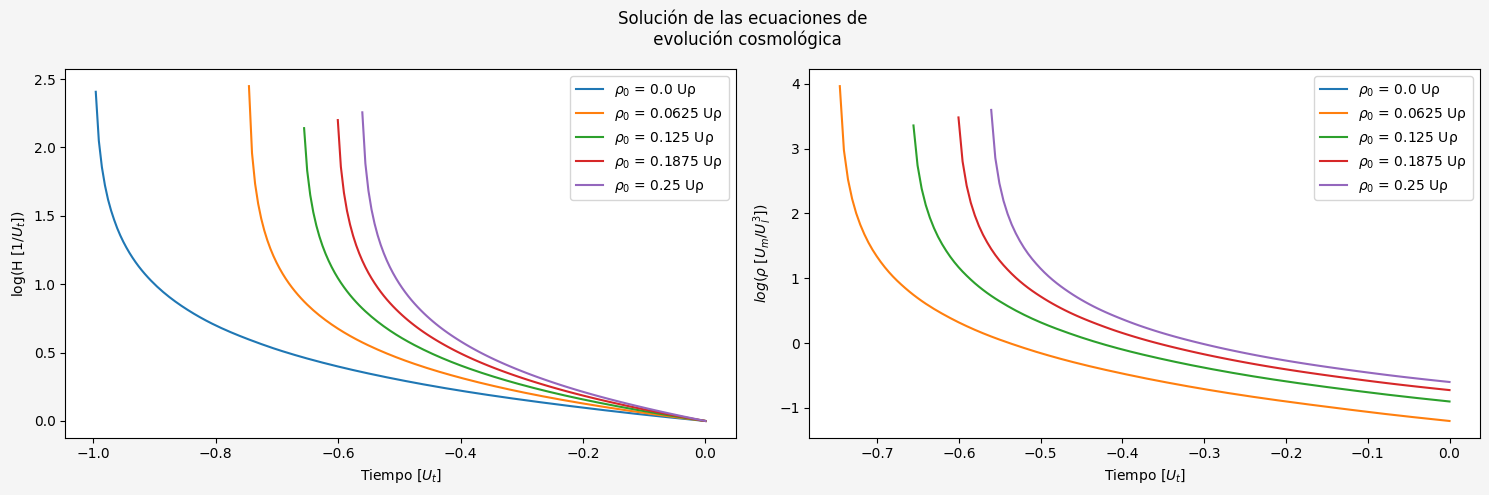

In [ ]:
fig, axs = plt.subplots(1, 2, facecolor= "whitesmoke", figsize = (15,5))
fig.suptitle('Solución de las ecuaciones de \n evolución cosmológica')


for i in range(len(rhos_mayores)):
  rhos, Hs, t = Sol_num_Hrho([rhos_mayores[i],H_0])
  axs[0].plot(t, np.log10(Hs),label = rf"$\rho_0$ = {(rhos_mayores[i])} Uρ")
  axs[1].plot(t, np.log10(rhos),label = rf"$\rho_0$ = {(rhos_mayores[i])} Uρ")


#--------------Constante de Hubble------------------
axs[0].set_xlabel(r"Tiempo $[U_t]$")
axs[0].set_ylabel(r"log(H $[1/U_t]$)")
axs[0].legend()

#-------------------Densidad------------------------
axs[1].set_xlabel(r"Tiempo $[U_t]$")
axs[1].set_ylabel(r"$log(\rho \ [U_m/U_l^3]$)")
axs[1].legend()

plt.tight_layout()

Al igual que en gráficas previas, la elección de una escala logarítmica en el eje tiene como propósito mejorar la visualización del comportamiento de los parámetros. Además, es evidente que tanto en el caso de la constante de Hubble como en la evolución de la densidad, se observa un crecimiento significativo de H a medida que el tiempo (en el pasado) se acerca asintóticamente a 1. Esto sugiere que si en la actualidad el universo estuviera vacío, la edad del universo sería del orden de la unidad canónica de tiempo.

# 3. Solución numericas de ecs. Friedmann-Lemaitre

3. **Solución a las ecuaciones de Friedmann-Lemaitre**. Vamos ahora e estudiar la solución numérica, para distintas condiciones, las ecuaciones de Friedmann-Lemaitre:

  $$
\begin{aligned}
& \epsilon=\frac{4 \pi}{3} G a^2\left[\frac{3 H^2}{8 \pi G}-\left(\rho+\rho_{\Lambda}\right)\right] \\
& \ddot{a}=\frac{4 \pi}{3} G\left(2 \rho_{\Lambda}-\rho\right) a
\end{aligned}
$$
  
  Para ello integre numéricamente la ecuación de aceleración asumiendo distintos escenarios de materia.
  
  - $\Omega_0 = 0.1$, $\Omega_{0\Lambda} = 0$ (universo abierto sin energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0$ (universo crítico sin energía oscura).
  - $\Omega_0 = 2$, $\Omega_{0\Lambda} = 0$ (universo cerrado sin energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0.3$ (universo crítico sin baja energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0.7$ (universo crítico con alta energía oscura).
  - $\Omega_0 = 2$, $\Omega_{0\Lambda} = 0.7$ (universo cerrado con energía oscura).
  
  donde $\Omega_0 = \Omega_{0m} + \Omega_{0\Lambda} = (\rho_{0m} + \rho_{0\Lambda})/\rho_{0c}$ es el parámetro de densidad total.

  En cada escenario haga gráficos de la evolución de $a(t)$, $\ddot a(t)$, $\rho(t)$ y $H(t)$.

  Para ello se sugiere integrar la ecuación hacia adelante en el tiempo y hacia atrás en el tiempo por un tiempo $\tau$ primero pequeño y después aumentarlo hasta que se llegue a $a(t)=0$.

Para abordar este problema, es esencial comprender que no es necesario integrar las cuatro ecuaciones, sino simplemente resolver la ecuación diferencial relacionada con el factor de escala y deducir los valores de densidad y el parámetro de Hubble a partir de su relación con el factor de escala $a(t)$.

Note que es el equivalente a resolver la ecuación de movimiento de un oscilador armonico, donde aparece un parámetro $\theta$ y $\ddot{\theta}$.

Para resolver, se hace un cambio de variable tal que:

\begin{align}
\dot{a}&=u\\
\dot{u}&=\frac{4 \pi}{3} G\left(2 \rho_{\Lambda}-\rho\right) a
\end{align}

Donde en términos del factor de escala:

$$\rho = \rho_0 \left(\frac{a_0}{a}\right)^3$$

$$H(t) = \frac{\dot{a}}{a}$$

In [ ]:
def Friedmann_Lemaitre(t,Y, rhos):
    a , u = Y
    rhoΛ , rho_0 = rhos

    #densidad en términos de a
    #En la actualidad a0 = 1
    a_0 = 1
    rho = rho_0 * (a_0 / a)**3

    #Ecs Friedmann-Lemaitre
    da = u
    du =  4 * np.pi / 3 * G * (2 * rhoΛ - rho) * a

    return [da, du]

Haciendo la integración hacia adelante y hacia atrás en una función general:


In [ ]:
def solucion_FL(Om_0 , Om_0Λ):
  rho_0c = 3 * H_0**2 / (8 * np.pi * G)

  #usando Om0 = Om0M+OmΛ = (ρ0m+ρ0Λ)/ρ0c
  Om_0M = Om_0 - Om_0Λ

  rho_0m =  Om_0 * rho_0c
  rho_0Λ =  Om_0Λ * rho_0c


  #tiempos
  t_atras = np.linspace(0,-UTau,1000)
  t_adelante = np.linspace(0,UTau,1000)

  #condicion inicial [a,u], arbitrariamente ponemos [1,1]
  #que sería el factor de escala actual a0= y dot_a=1 para que H=1
  y0 = [1,1]

  #Se cambia el valor de rhos (argumentos independientes)
  #antes de cada integracion numerica.
  rhos = [rho_0Λ ,rho_0m]

  #integración
  sol_atras = solve_ivp(Friedmann_Lemaitre, (t_atras[0],t_atras[-1]),
                        y0,args=(rhos,), t_eval=t_atras)
  sol_adelante = solve_ivp(Friedmann_Lemaitre, (t_adelante[0],t_adelante[-1]),
                        y0,args=(rhos,), t_eval=t_adelante)

  return sol_atras, sol_adelante, rho_0m , rho_0Λ


Parametros de los universos:

  - $\Omega_0 = 0.1$, $\Omega_{0\Lambda} = 0$ (universo abierto sin energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0$ (universo crítico sin energía oscura).
  - $\Omega_0 = 2$, $\Omega_{0\Lambda} = 0$ (universo cerrado sin energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0.3$ (universo crítico sin baja energía oscura).
  - $\Omega_0 = 1$, $\Omega_{0\Lambda} = 0.7$ (universo crítico con alta energía oscura).
  - $\Omega_0 = 2$, $\Omega_{0\Lambda} = 0.7$ (universo cerrado con energía oscura).

In [ ]:
parametros = np.array([[0.1,0],
                       [1  ,0],
                       [2  ,0],
                       [1  ,0.3],
                       [1  ,0.7],
                       [2  ,0.7]])

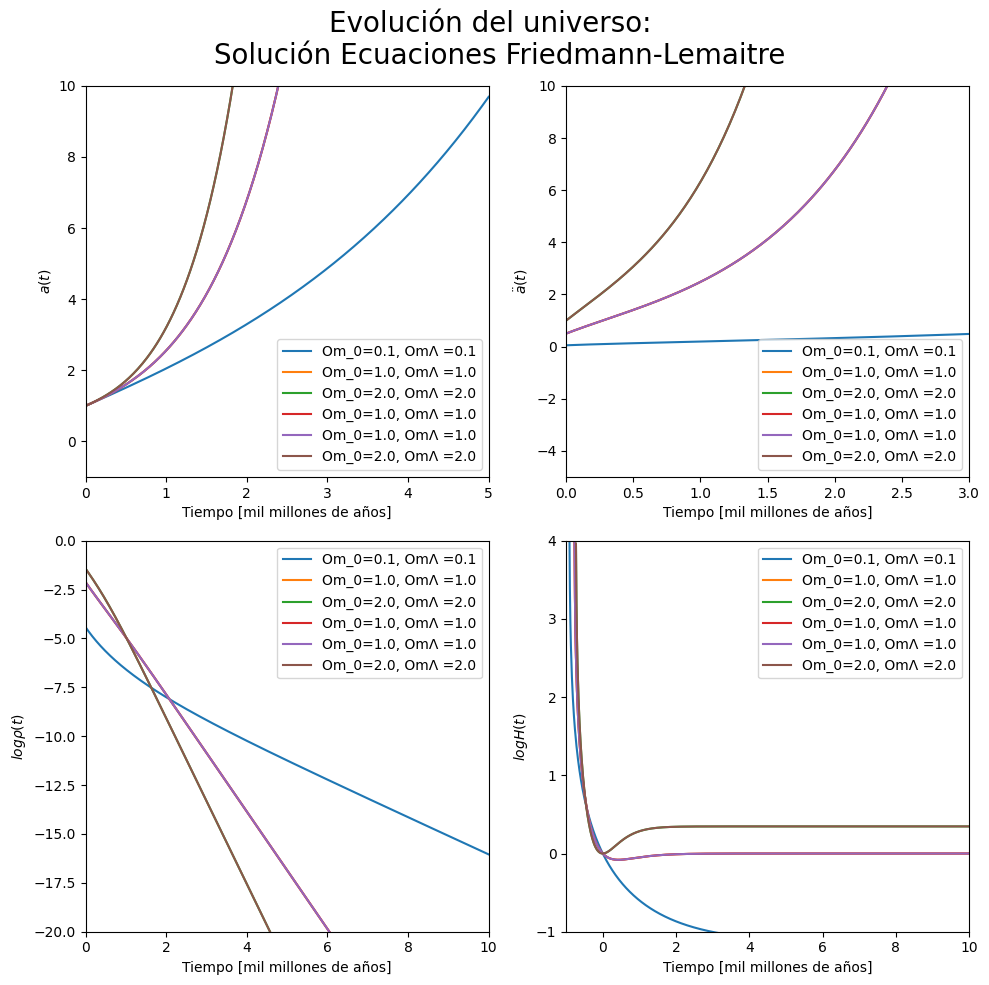

In [ ]:
#---------------------------GRAFICA----------------------------
fig, axs = plt.subplots(2, 2, figsize = (10,10))
fig.suptitle("Evolución del universo: \n Solución Ecuaciones Friedmann-Lemaitre",
             size=20 )

#--------------Extracción de datos cada universo----------------
for universo in range(len(parametros)):
  Om0 = parametros[universo][0]
  OmΛ = parametros[universo][0]

  sol_atras, sol_adelante , rho_0m , rho_0Λ = solucion_FL( Om0, OmΛ)

  #Extraer solucion
  t_atras = sol_atras.t; a_atras, u_atras = sol_atras.y
  t_adelante = sol_adelante.t;  a_adelante, u_adelante = sol_adelante.y

  #se debe invertir porque se juntarán ambas soluciones
  t_atras = t_atras[::-1]
  a_atras = a_atras[::-1]
  u_atras = u_atras[::-1]

  #Datos en el intervalo completo (integracion adelante y atrás)
  t_full = np.concatenate((t_atras,t_adelante))
  a_full = np.concatenate((a_atras,a_adelante))
  u_full = np.concatenate((u_atras,u_adelante))

  #---------------------PARAMETROS OBTENIDOS DE a---------------------
  #H = dot{a}/a
  H_full = u_full / a_full

  #rho_0m toma el ultimo valor guardado, que es el de la función solucion_FL
  a_0 = 1
  rho_full = rho_0m * (a_0 / a_full)**3

  #ec. Friedmann-Lemaitre
  ddot_a =  4 * np.pi / 3 * G * (2 * rho_0Λ - rho_full) * a_full


  #------------------grafica de solucion------------------


  axs[0,0].plot(t_full, a_full,
                label = f"Om_0={Om0}, OmΛ ={OmΛ}")
  axs[0,1].plot(t_full, ddot_a,
                label = f"Om_0={Om0}, OmΛ ={OmΛ}")
  axs[1,0].plot(t_full, np.log(rho_full),
                label = f"Om_0={Om0}, OmΛ ={OmΛ}")
  axs[1,1].plot(t_full, np.log(H_full),
                label = f"Om_0={Om0}, OmΛ ={OmΛ}")


#-------------------------------------------------------------

#Ajuste de ejes
axs[0,0].set_ylabel(r"$a(t)$")
axs[0,1].set_ylabel(r"$\ddot{a}(t)$")
axs[1,0].set_ylabel(r"$log \rho(t)$")
axs[1,1].set_ylabel(r"$log H(t)$")

for i in range(2):
  for j in range(2):
    axs[i,j].set_xlabel('Tiempo [mil millones de años]')
    axs[i,j].legend()

axs[0, 0].set_xlim(-0,5)
axs[0, 0].set_ylim(-1,10)
axs[0, 1].set_xlim(0,3)
axs[0, 1].set_ylim(-5,10)
axs[1, 0].set_xlim(0,10)
axs[1, 0].set_ylim(-20,0)
axs[1, 1].set_xlim(-1,10)
axs[1, 1].set_ylim(-1,4)




plt.tight_layout()

# 5. Edad del universo

5. **La edad del universo**. Hay una forma de calcular la edad del universo, que en los experimentos anteriores tuvo que encontrarse manualmente.  Para ello se define el que se conoce como el *loopback time* (tiempo de mirada atrás), $t_{LB}$. Este número es el tiempo que se ha expandido el universo desde un valor específico del factor de escala $a(t)$ hasta el presente cuando $a(t_0)=1$.

   Partiendo de la definición del parámetro de Hubble:
   $$
   H=\frac{\dot a}{a}
   $$

   mostrar que el tiempo cósmico correspondiente a un determinado valor de $a$ se puede obtener como:

   $$
   t_{LB}(a) = t_0 - t(a) = \int_{a}^{1} \frac{\mathrm{d}a'}{a' H(a')}
   $$
   donde $t_0$ es el tiempo actual.

   Nótese que cuando $a=0$ el $t_{LB}$ es la edad $\tau_0$ del universo.

   Para calcular el $t_{LB}$ es necesario encontrar una ecuación que nos de $H$ como función de $a$. Eso se logra despejando $H$ de la ecuación de Friedman-Lemeitre:

   $$
   \epsilon=\frac{4 \pi}{3} G a^2\left[\frac{3 H^2}{8 \pi G}-\left(\rho+\rho_{\Lambda}\right)\right]
   $$
   donde recordemos $\epsilon$ es una constante.

   Demuestre que $H$ se puede escribir como:

   $$
   \frac{H^2}{H_0^2} = \frac{\rho+\rho_\Lambda + \rho_k}{\rho_{c0}}
   $$

   donde:
   $$
   \rho_k \equiv \frac{3 \epsilon}{4\pi G} \frac{1}{a^2}
   $$
   es una densidad ficticia que llamaremos *densidad de curvatura* (por un término usado en relatividad general, pero que aquí es solo una definición).

   Sabemos que la materia tiene una densidad que cambia según la ley $\rho_m=\rho_{0m}(a_0/a)^3$, que la energía oscura tiene $\rho_\Lambda = \rho_{0\Lambda}$ (no cambia en el tiempo) y que la densidad de curvatura varia según $\rho_k=\rho_{0k}(a_0/a)^2$. Usando esto mostrar que $H$ se puede escribir como:

   $$
   H(a) = H_0\sqrt{\Omega_{0m}(a_0/a)^3 + \Omega_{0k}(a_0/a)^2 + \Omega_\Lambda}
   $$

   En astrofísica, el corrimiento al rojo se relaciona con el factor de escala
   así: $a/a_0 = 1/(1+z)$.  Teniendo en cuenta la ecuación para $H(a)$ y escribiéndola en términos de $z$ el $t_{LB}$ es:

   $$
   t_{LB}(z) = t_H \int_0^z \frac{dz}{(1+z)\sqrt{\Omega_{0m}(1+z)^3 + \Omega_{0k}(1+z)^2 + \Omega_\Lambda}}
   $$

   Y la edad del universo será:

   $$
   \tau_0 = t_H \int_0^\infty \frac{dz}{(1+z)\sqrt{\Omega_{0m}(1+z)^3 + \Omega_{0k}(1+z)^2 + \Omega_\Lambda}}
   $$

   Donde $t_H=1/H_0$.

   Use la rutina `scipy.integrate.quad` para hacer esta integral (como limite superior puede poner `np.inf` y la rutina entiende que es una integral impropia) y calcular así la edad que tiene hoy el universo en los modelos cosmológicos estudiados en 3.

## Deducciones



### 1.
De la definición en términos del factor de escala del parámetro de Hubble:

$$H(a)=\frac{\dot{a}}{a}$$

Recordando que $\dot{a}=\frac{d}{dt}a(t)=aH(a)$. Entonces es válido hacer una separación de variables tal que:

$$\frac{da}{dt}=aH(a)$$

$$\frac{da}{aH(a)}=dt$$

Integrando entre $(a,1)$ porque en la actualidad el factor de escala es $a=1$, y teniendo en consideración que se pueden primar las variables de integración, entonces:

$$\int_{t(a)}^{t_0}dt=\int_{a}^{1}\frac{da'}{a'H(a')}$$

$$t_0-t(a)=\int_{a}^{1}\frac{da'}{a'H(a')}$$

donde $t_LB=t_0-t(a)$ es la edad del universo, y $t_0$ es el tiempo actual.



### 2.
De la ecuación de Friedmann-Lemaitre, la energía es constante y etá dada como:
$$
   \epsilon=\frac{4 \pi}{3} G a^2\left[\frac{3 H^2}{8 \pi G}-\left(\rho+\rho_{\Lambda}\right)\right]
   $$

Debemos buscar despejar el parámetro de Hubble, así:

$$\frac{3\epsilon}{4\pi G a^2}=\left[\frac{3 H^2}{8 \pi G}-\left(\rho+\rho_{\Lambda}\right)\right]$$

Llamemos la densidad de curvatura $\rho_k = \frac{3\epsilon}{4\pi G a^2}$. De modo que:

$$\frac{3 H^2}{8 \pi G}=\rho_k+\rho+\rho_{\Lambda}$$


Por otra parte note que $(\frac{H_0}{H_0})^2=1$, de modo que se puede multiplicar la expresión sin cambiarla, con la intención de manipularla para obtener la densidad crítica actual $\rho_{0c}= \frac{3 H_0^2}{8 \pi G}$:

\begin{align}
\frac{3 H^2}{8 \pi G}\frac{H_0^{2}}{H_0^{2}}&=\rho+\rho_k+\rho_{\Lambda}\\
{\frac{3 H_0^2}{8 \pi G}}\frac{H^{2}}{H_0^{2}}&=\rho+\rho_k+\rho_{\Lambda}\\
\rho_{0c}\frac{H^{2}}{H_0^{2}}&=\rho+\rho_k+\rho_{\Lambda}
\end{align}

Por lo que finalmente se puede escribir el parámetro de Hubble escalado con la constante de Hubble como:

$$\frac{H^2}{H_0^2} = \frac{\rho+\rho_\Lambda + \rho_k}{\rho_{c0}}$$




3.

De la deducción previa:

$$\frac{H^2}{H_0^2} = {\frac{\rho_m}{\rho_{c0}}}+{\frac{\rho_\Lambda }{\rho_{c0}}}+{\frac{\rho_k}{\rho_{c0}}} \ \ (1)$$

Por definición, la cantidad $\Omega$ proporciona el valor de una densidad en términos de la densidad crítica actual, tal que:

\begin{align}
\Omega_{0m}&=\frac{\rho_{0m}}{\rho_{0c}}\ \ \Rightarrow \rho_{0m}=\Omega_{0m}\rho_{0c}\\
\Omega_{0k}&=\frac{\rho_{0k}}{\rho_{0c}}\ \ \Rightarrow \rho_{0k}=\Omega_{0k}\rho_{0c}\\
\Omega_{0\Lambda}&=\frac{\rho_{0\Lambda}}{\rho_{0c}}\ \ \Rightarrow \rho_{0\Lambda}=\Omega_{0\Lambda}\rho_{0c}\\
\end{align}
Como se dedujo en el curso, la densidad se puede escribir en términos del factor de escala y la densidad inicial como:

$$\rho = \rho_0 \left(\frac{a_0}{a}\right)^3$$

Para la densidad de curvatura y la densidad de materia es válido decir que:

$$\frac{\rho_k}{\rho_{0k}} =  \left(\frac{a_0}{a}\right)^3$$

$$\frac{\rho_m}{\rho_{0m}}= \left(\frac{a_0}{a}\right)^3$$

Sin embargo, para la densidad de energía oscura, desde el modelo está especificado que $\rho_\Lambda=\rho_{0\Lambda}$ porque ésta no puede cambiar con el tiempo en cuanto aumenta la expansión para que el modelo continue siendo consistente.

Reemplazando los valores de $\Omega_0$ en las densidades anteriores, entonces:

\begin{align}
\frac{\rho_m}{\rho_{0c}}&=\Omega_{0m}\left ( \frac{a_0}{a} \right )^{3}\\
\frac{\rho_k}{\rho_{0c}}&=\Omega_{0k}\left ( \frac{a_0}{a} \right )^{3}\\
\frac{\rho_\Lambda}{\rho_{0c}}&=\Omega_{0\Lambda}\\
\end{align}

Reemplazando en (1):

$$\frac{H^2}{H_0^2} = \Omega_{0m}\left ( \frac{a_0}{a} \right )^{3}+\Omega_{0k}\left ( \frac{a_0}{a} \right )^{3}+\Omega_{0\Lambda}$$

Despejando $H$ que tiene dependencia de $a$:

$$H(a) = H_0 \sqrt{\Omega_{0m}\left ( \frac{a_0}{a} \right )^{3}+\Omega_{0k}\left ( \frac{a_0}{a} \right )^{3}+\Omega_{0\Lambda}}$$


## Integración

In [ ]:
# Función para la integración
def integrante(z):
    return 1 / ((1 + z) * np.sqrt(Om0m * (1 + z)**3 +
                                  Omk * (1 + z)**2 + OmΛ))

In [ ]:
for universo in range(len(parametros)):
  Om0m = parametros[universo][0]-parametros[universo][1]
  OmΛ = parametros[universo][1]
  Omk = 0

  #Haciendo la integral
  Tau, _ = quad(integrante, 0, np.inf)

  print(f"La edad del universo con Ω_0 = {Om0m:.0f} y Ω_0Λ = {OmΛ} es {Tau*UTau:.2f} mil millones de años")

La edad del universo con Ω_0 = 0 y Ω_0Λ = 0.0 es 29.10 mil millones de años
La edad del universo con Ω_0 = 1 y Ω_0Λ = 0.0 es 9.20 mil millones de años
La edad del universo con Ω_0 = 2 y Ω_0Λ = 0.0 es 6.51 mil millones de años
La edad del universo con Ω_0 = 1 y Ω_0Λ = 0.3 es 10.33 mil millones de años
La edad del universo con Ω_0 = 0 y Ω_0Λ = 0.7 es 13.31 mil millones de años
La edad del universo con Ω_0 = 1 y Ω_0Λ = 0.7 es 7.48 mil millones de años
